# Assignment: Lesson 10 Assignment
Autor: Ajai Shukla
For this assignment, you will leverage the RNN_KERAS.ipynb lab in the lesson. You are tasked to use the Keras Reuters newswire topics classification dataset. This dataset contains 11,228 newswires from Reuters, labeled with over 46 topics. Each wire is encoded as a sequence of word indexes. For convenience, words are indexed by overall frequency in the dataset, so that for instance the integer "3" encodes the 3rd most frequent word in the data. This allows for quick filtering operations such as: "only consider the top 10,000 most common words, but eliminate the top 20 most common words". As a convention, "0" does not stand for a specific word, but instead is used to encode any unknown word.
Instructions

Complete the lab exercises for this week before following these steps to complete your assignment.

Using the Keras dataset (Links to an external site.), create a new notebook and perform each of the following data preparation tasks and answer the related questions:

    Read Reuters dataset into training and testing 
    Prepare dataset
    Build and compile 3 different models using Keras LTSM ideally improving model at each iteration.
    Describe and explain your findings.


# Read Reuters dataset into training and testing 

In [56]:
import numpy as np
np.load.__defaults__=(None, True, True, 'ASCII')

In [86]:
%matplotlib inline

In [83]:
import keras
from keras.datasets import reuters

In [87]:
import numpy as np
import pandas as pd
import theano
import theano.tensor as T
import keras 

import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# -- Keras Import
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.preprocessing import image
import time, pickle
from keras.datasets import reuters
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

from keras.utils import np_utils
from keras.preprocessing import sequence
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import LSTM, GRU, SimpleRNN

from keras.layers import Activation, TimeDistributed, RepeatVector
from keras.callbacks import EarlyStopping, ModelCheckpoint

W0910 23:17:02.670085  7052 configdefaults.py:515] g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\ashukla\Anaconda3\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
W0910 23:17:02.679939  7052 configdefaults.py:580] g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
W0910 23:17:05.732460  7052 blas_headers.py:988] Using NumPy C-API based implementation for BLAS functions.


# Data Preparation - reuters

In [88]:
max_features = 10000
maxlen = 100  # cut texts after this number of words (among top max_features most common words)
batch_size = 32

print("Loading data...")
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=max_features)
print(len(X_train), 'train sequences')
print(len(X_test), 'test sequences')

print('Example:')
print(X_train[:1])

print("Pad sequences (samples x time)")
X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

Loading data...
8982 train sequences
2246 test sequences
Example:
[list([1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12])]
Pad sequences (samples x time)
X_train shape: (8982, 100)
X_test shape: (2246, 100)


# Model building


In [91]:
from tensorflow import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.models import Sequential
import numpy as np

In [92]:
print('Build model...')
model = keras.Sequential()
model.add(keras.layers.Embedding(max_features, 128, input_length=maxlen))
model.add(keras.layers.SimpleRNN(128))  
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(1))
model.add(keras.layers.Activation('sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy', optimizer='adam')

print("Train...")
model.fit(X_train, y_train, batch_size=batch_size, epochs=1, 
          validation_data=(X_test, y_test))

Build model...
Train...
Train on 8982 samples, validate on 2246 samples
8982/8982 [==============================] - 10s 1ms/sample - loss: -224.4477 - val_loss: -376.4763


# Prepare dataset

In [93]:
print(x_train[1])

[1, 3267, 699, 3434, 2295, 56, 2, 7511, 9, 56, 3906, 1073, 81, 5, 1198, 57, 366, 737, 132, 20, 4093, 7, 2, 49, 2295, 2, 1037, 3267, 699, 3434, 8, 7, 10, 241, 16, 855, 129, 231, 783, 5, 4, 587, 2295, 2, 2, 775, 7, 48, 34, 191, 44, 35, 1795, 505, 17, 12]


We notice that the input is numbers and not word! Well the words are encoded as a sequence of word indexes where words are indexed by overall frequency. For example, "3" encodes the 3rd most frequent word in the data.


In [94]:
# A dictionary mapping words to an integer index
word_index = reuters.get_word_index(path="reuters_word_index.json")


In [95]:

# The first indices are reserved
word_index = {k:(v+3) for k,v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

In [96]:
decode_review(x_train[0])

'<START> <UNK> <UNK> said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

As we learned in the lesson, we need to alter the input sequences so that they all have the same length for modeling. For this, we will use the preprocessing library within keras.


In [97]:
# Only consider the first 400 words within the review
max_review_length = 400
x_train = keras.preprocessing.sequence.pad_sequences(x_train, maxlen=max_review_length)
x_test = keras.preprocessing.sequence.pad_sequences(x_test, maxlen=max_review_length)

We are not ready to build our model. We will have sequential layers with an input layer, an LTSM layer, and dense output layer. The input layer is of size 32 for each input word. The second layer is an LTSM layer with size 100, and finally one output node since we have a binary classification problem.


# Build and compile 3 different models using Keras LTSM ideally improving model at each iteration.

In [98]:
from tensorflow import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation

In [99]:
# Construct our model
embedding_vecor_length = 32
model = keras.models.Sequential()
model.add(keras.layers.Embedding(num_of_words, embedding_vecor_length, input_length=max_review_length))
model.add(keras.layers.LSTM(100))
model.add(keras.layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=3, batch_size=64)

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 400, 32)           320000    
_________________________________________________________________
unified_lstm_11 (UnifiedLSTM (None, 100)               53200     
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 101       
Total params: 373,301
Trainable params: 373,301
Non-trainable params: 0
_________________________________________________________________
None
Train on 8982 samples, validate on 2246 samples
Epoch 1/3
8982/8982 [==============================] - 73s 8ms/sample - loss: -126.2969 - accuracy: 0.0475 - val_loss: -201.1212 - val_accuracy: 0.0467
Epoch 2/3
8982/8982 [==============================] - 79s 9ms/sample - loss: -259.3994 - accuracy: 0.0481 - val_loss: -318.7434 - val_accuracy: 0.0467
Epoch 3/3
8982/8982 

In [100]:
scores = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 4.67%


In [101]:
import matplotlib.pyplot as plt

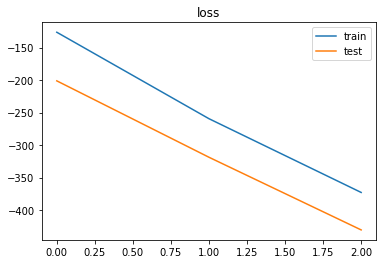

In [102]:
plt.title('loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

In [111]:
from keras.models import Sequential
from keras.layers import  LSTM, Dense
import numpy as np

In [112]:
from keras.models import Sequential
import numpy as np
data_dim = 16
timesteps = 8
nb_classes = 10
batch_size = 32
model1 = keras.models.Sequential()
model1.add(keras.layers.LSTM(32, return_sequences=True, stateful=True,
               batch_input_shape=(batch_size, timesteps, data_dim)))

model1.add(keras.layers.LSTM(32, return_sequences=True, stateful=True))
model1.add(keras.layers.LSTM(32, stateful=True))
model1.add(keras.layers.Dense(10, activation='softmax'))



In [113]:
model1.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [114]:
# generate dummy training data
X_train = np.random.random((batch_size * 10, timesteps, data_dim))
y_train = np.random.random((batch_size * 10, nb_classes))

#(X_train, y_train), (X_test, y_test)

In [115]:
# generate dummy validation data
x_val = np.random.random((batch_size * 3, timesteps, data_dim))
y_val = np.random.random((batch_size * 3, nb_classes))

In [116]:
model1.fit(x_train, y_train,
          batch_size=batch_size, nb_epoch=5,
          validation_data=(x_val, y_val))

W0911 14:34:25.582107  7052 training.py:686] The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 320 samples, validate on 96 samples
Epoch 1/5
320/320 [==============================] - 1s 3ms/sample - loss: 11.5802 - accuracy: 0.0781 - val_loss: 12.0868 - val_accuracy: 0.0938
Epoch 2/5
320/320 [==============================] - 0s 375us/sample - loss: 12.2141 - accuracy: 0.0594 - val_loss: 12.5409 - val_accuracy: 0.0938
Epoch 3/5
320/320 [==============================] - 0s 313us/sample - loss: 12.4936 - accuracy: 0.0594 - val_loss: 12.7668 - val_accuracy: 0.0938
Epoch 4/5
320/320 [==============================] - 0s 281us/sample - loss: 12.7405 - accuracy: 0.0594 - val_loss: 12.9493 - val_accuracy: 0.0938
Epoch 5/5
320/320 [==============================] - 0s 313us/sample - loss: 12.8610 - accuracy: 0.0594 - val_loss: 13.0170 - val_accuracy: 0.0938


In [117]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

ValueError: Error when checking input: expected embedding_7_input to have shape (400,) but got array with shape (100,)